In [1]:
import os
import numpy as np
import xarray as xr
from src.data_processing import process_smap, process_nldas, process_forcing, _subset_states
from utils.global_paths import project_data_path, project_code_path, nldas_path
from utils.subsets import subsets

### CONUS

In [2]:
subset_name = "CONUS"
list_of_states = None

In [3]:
# Make directories
output_path = f"{project_data_path}/WBM/calibration/{subset_name}"

# Main
if not os.path.isdir(output_path):
    os.mkdir(output_path)
    
# Subs
for sub in ["SMAP", "VIC", "NOAH", "MOSAIC"]:
    if not os.path.isdir(f"{output_path}/{sub}"):
        os.mkdir(f"{output_path}/{sub}")

In [4]:
nldas_grid = _subset_states(xr.open_dataset(f"{nldas_path}/VIC/daily/NLDAS_VIC0125_H.A20221231.nc"), list_of_states)  # random date

In [12]:
224*464

103936

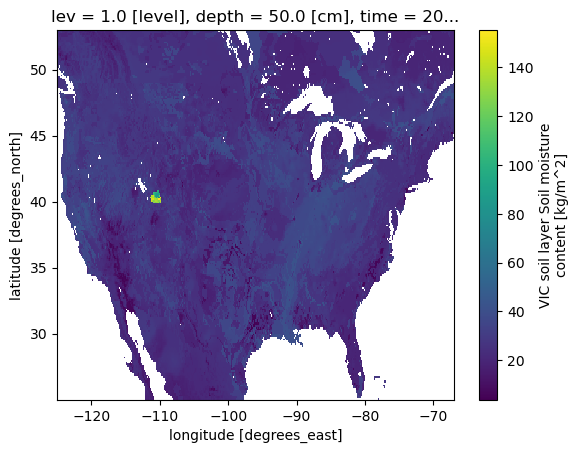

In [10]:
nldas_grid.isel(time=0, depth=0, lev=0)['SOILM'].plot()

In [19]:
# Get and store grid
nldas_grid = _subset_states(xr.open_dataset(f"{nldas_path}/VIC/daily/NLDAS_VIC0125_H.A20221231.nc"), list_of_states)  # random date

np.save(f"{project_code_path}/code/utils/grids/{subset_name}_lon.npy", nldas_grid.lon.to_numpy())
np.save(f"{project_code_path}/code/utils/grids/{subset_name}_lat.npy", nldas_grid.lat.to_numpy())

In [9]:
%%time
# SMAP
process_smap(subset_name, list_of_states)

CPU times: user 33.9 s, sys: 17.3 s, total: 51.2 s
Wall time: 2min 12s


In [10]:
%%time
# NLDAS
process_nldas(subset_name, list_of_states)

CPU times: user 3min 4s, sys: 1min 1s, total: 4min 5s
Wall time: 8min 5s


In [11]:
%%time
# Forcing
process_forcing(subset_name, list_of_states)

CPU times: user 3min 18s, sys: 1min 32s, total: 4min 51s
Wall time: 13min 8s


### eCONUS

In [2]:
subset_name = "eCONUS"
list_of_states = subsets[subset_name]

In [3]:
# Make directories
output_path = f"{project_data_path}/WBM/calibration/{subset_name}"

# Main
if not os.path.isdir(output_path):
    os.mkdir(output_path)
    
# Subs
for sub in ["SMAP", "VIC", "NOAH", "MOSAIC"]:
    if not os.path.isdir(f"{output_path}/{sub}"):
        os.mkdir(f"{output_path}/{sub}")

In [4]:
# Get and store grid
if not os.path.exists(f"{project_code_path}/code/utils/grids/{subset_name}_lon.npy"):
    nldas_grid = _subset_states(xr.open_dataset(f"{nldas_path}/VIC/daily/NLDAS_VIC0125_H.A20221231.nc"), list_of_states)  # random date

    np.save(f"{project_code_path}/code/utils/grids/{subset_name}_lon.npy", nldas_grid.lon.to_numpy())
    np.save(f"{project_code_path}/code/utils/grids/{subset_name}_lat.npy", nldas_grid.lat.to_numpy())

In [5]:
%%time
# SMAP
process_smap(subset_name, list_of_states)

SMAP already processed
CPU times: user 631 µs, sys: 127 µs, total: 758 µs
Wall time: 5.4 ms


In [6]:
%%time
# NLDAS
process_nldas(subset_name, list_of_states)

CPU times: user 49 µs, sys: 1.01 ms, total: 1.06 ms
Wall time: 15 ms


In [7]:
%%time
# Forcing
process_forcing(subset_name, list_of_states)

CPU times: user 1min 49s, sys: 27 s, total: 2min 16s
Wall time: 3min 32s


### Midwest

In [2]:
subset_name = "midwest"
list_of_states = ["North Dakota", "South Dakota", "Nebraska", "Kansas",
                  "Minnesota", "Iowa", "Missouri", 
                  "Wisconsin", "Illinois",
                  "Michigan", "Indiana", "Kentucky", "Ohio"]

In [4]:
# Make directories
output_path = f"{project_data_path}/WBM/calibration/{subset_name}"

# Main
if not os.path.isdir(output_path):
    os.mkdir(output_path)
    
# Subs
for sub in ["SMAP", "VIC", "NOAH", "MOSAIC"]:
    if not os.path.isdir(f"{output_path}/{sub}"):
        os.mkdir(f"{output_path}/{sub}")

In [5]:
%%time
# SMAP
process_smap(subset_name, list_of_states)

CPU times: user 1min 34s, sys: 17.3 s, total: 1min 51s
Wall time: 2min 58s


In [6]:
%%time
# NLDAS
process_nldas(subset_name, list_of_states)

CPU times: user 5min 20s, sys: 26.4 s, total: 5min 46s
Wall time: 9min 23s


In [7]:
%%time
# Forcing
process_forcing(subset_name, list_of_states)

CPU times: user 6min 28s, sys: 32.8 s, total: 7min 1s
Wall time: 10min 3s
